In [1]:
from config import *

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np

%matplotlib inline

In [3]:
print(f'{year}年{month}月')

2020年8月


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [5]:
conn=db.get_conn()

In [7]:
stat_data = pd.read_sql(sql='select * from general_stats order by year_month', con=conn)
stat_data

,year_month,salary_mean,salary_median,jd_count,head_count
0,202001,13793,12500,85009,271682
1,202002,14379,12500,79887,247850
2,202003,14514,12500,74063,228240
3,202004,14506,12500,97825,295541
4,202005,14488,12500,102002,309115
5,202006,14370,12500,103149,310619
6,202007,14415,12500,96986,288685
7,202008,14392,12500,117886,346301


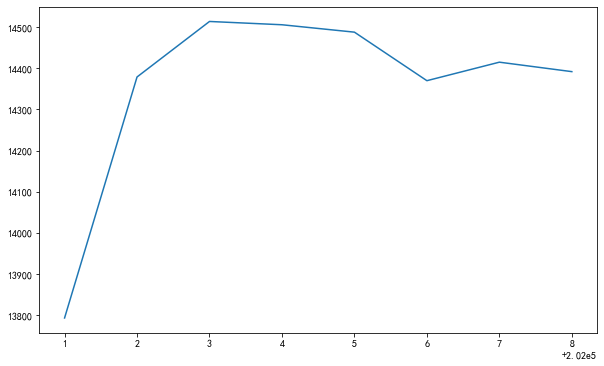

In [8]:
plt.figure(figsize=(10,6))
plt.plot("year_month","salary_mean",data=stat_data)
plt.show()

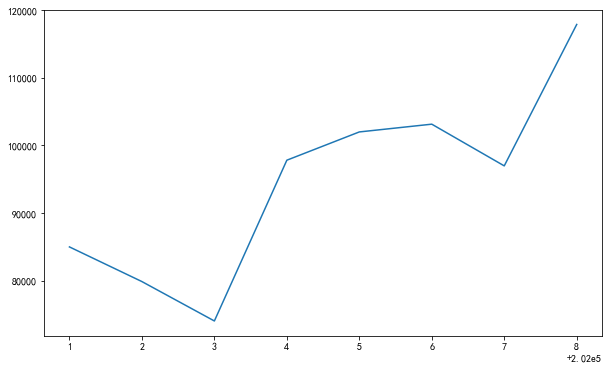

In [10]:
plt.figure(figsize=(10,6))
plt.plot("year_month","jd_count",data=stat_data)
plt.show()

In [ ]:
counts=[]
percentages=[]
count1=conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]
counts.append(count1)

for i in range(1,month-6+1):
    i_count=conn.execute(f"select COUNT(1) from _{year}{month:02} a inner join _{year}{month-i:02} b on a.job_id=b.job_id").fetchall()[0][0]
    counts.append(i_count)
    percentages.append((counts[i-1]-i_count)/counts[0])
    
percentages.append(counts[-1]/counts[0])
print(percentages)

labels=[]
for i in range(1,month-6+1):
    labels.append(i)
labels.append(f"{str(month-6+1)}+")

plt.pie(percentages, labels=labels)
plt.title("Age of Jobs")
plt.show()

# 按照职能统计平均工资

In [13]:
data_original=pd.read_sql(sql=f"select * from jobs where year_month={year}{month:02} and monthly_salary>0 and monthly_salary<100000", con=db.get_conn())

data_career=data_original.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career['salary']=data_career['salary'].astype(int)

data_career[f'2020年{month}月']=data_career['salary']
del data_career['salary']

In [18]:
data_original2019=pd.read_sql(sql=f"select * from jobs where year_month={year}{1:02} and monthly_salary>0 and monthly_salary<100000", con=db.get_conn())

data_career2019=data_original2019.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career2019[f'{year}年{1}月']=data_career2019['salary'].astype(int)
del data_career2019['salary']

In [19]:
data_career2019.join(data_career, how='outer')

,2020年1月,2020年8月
career,,
ADAS,20243.0,16999
Android开发工程师,13170.0,14292
BI工程师,NaN,13876
CAE,15976.0,14674
CTO,39624.0,31396
...,...,...
视觉软件工程师,14009.0,14247
语音识别工程师,NaN,14829
软件工程师,12961.0,13644


In [18]:
salary=data_original.monthly_salary.values

In [19]:
salary.sort()

In [20]:
data_original[data_original['monthly_salary'].isna()]

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_id,...,bd_hbase,bd_storm,bd_pig,bd_mahout,bd_impala,bd_yarn,bd_alluxio,bd_flink,bd_presto,bd_heron


In [21]:
import numpy as np

In [26]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               color='darkgreen', s=1)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')
    ax.set_xlabel("累计人群")
    ax.set_ylabel("累计收入")
    ax.set_title("洛伦茨曲线")

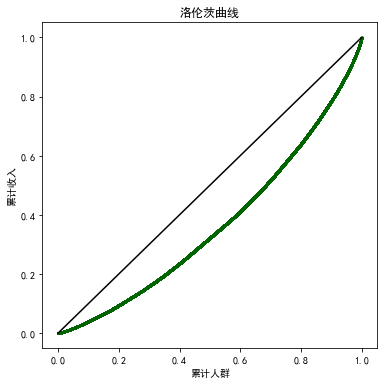

In [27]:
lorenz_curve(salary)

In [ ]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_


In [ ]:
gini(salary)

In [ ]:
len(salary)

In [ ]:
city_salary=data_original.loc[data_original['city']=='北京'].monthly_salary.values
display(gini(city_salary))
display(lorenz_curve(city_salary))

In [ ]:
city_salary=data_original.loc[data_original['city']=='杭州'].monthly_salary.values
display(gini(city_salary))
display(lorenz_curve(city_salary))